import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


load and preview dataset

In [20]:
df = pd.read_csv(r"C:\datasets\customer review.csv")  # Use raw path if needed
df = df[['Review_text', 'Own_Rating']]  # Use only relevant columns
df.dropna(inplace=True)
df.head()


,Review_text,Own_Rating
0,I liked it,Positive
1,I bought the phone on Amazon and been using my...,Positive
2,"Awesome book at reasonable price, must buy ......",Positive
3,good,Positive
4,"The book is fine,not bad,contains nice concept...",Neutral


Filter for Binary Classification (Positive/Negative only) removing neutral for simplicity

In [22]:
# Remove Neutral reviews
df = df[df['Own_Rating'].isin(['Positive', 'Negative'])]

# Encode labels
df['label'] = df['Own_Rating'].map({'Positive': 1, 'Negative': 0})

# Final features and labels
X = df['Review_text']
y = df['label']


TF-IDF Vectorization


In [23]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)


train-test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)


Train Logistic Regression

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


evaluate model

Accuracy: 0.9277790889780505

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.65      0.74      2726
           1       0.94      0.98      0.96     14222

    accuracy                           0.93     16948
   macro avg       0.90      0.82      0.85     16948
weighted avg       0.92      0.93      0.92     16948



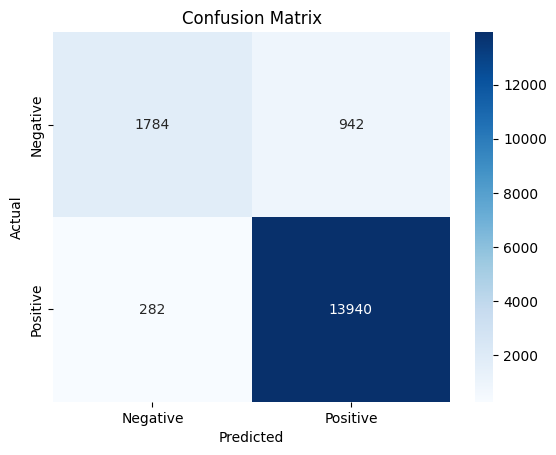

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


predict customer review

In [29]:
sample = ["bad product"]
sample_vec = vectorizer.transform(sample)
prediction = model.predict(sample_vec)
print("Predicted Sentiment:", "Positive" if prediction[0]==1 else "Negative")


Predicted Sentiment: Negative
